In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_excel(r"../Excel Data/Cleaned Games Sales.xlsx")
df

,Title,Console,Genre,Publisher,Developer,Critic Score,Total Sales,North America Sales,Japan Sales,Europe & Africa Sales,Other Sales,Release Date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20320000,6370000,990000,9850000,3120000,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19390000,6060000,600000,9710000,3020000,2014-11-18
2,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15090000,6180000,410000,6050000,2440000,2015-11-06
3,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13940000,5260000,210000,6210000,2260000,2018-10-26
4,Call of Duty: WWII,PS4,Shooter,Activision,Sledgehammer Games,8.1,13400000,4670000,400000,6210000,2120000,2017-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...
215,Sushi Striker: The Way of Sushido,NS,Puzzle,Nintendo,Indies Zero,7.9,70000,20000,30000,10000,0,2018-06-08
216,RPG Maker: Fes,3DS,Role-Playing,NIS America,Kadokawa Games,7.0,70000,30000,20000,0,0,2017-06-27
217,BlazBlue: Cross Tag Battle,NS,Fighting,Arc System Works,Arc System Works,8.0,70000,40000,10000,10000,10000,2018-06-05
218,Disgaea 1 Complete,NS,Role-Playing,NIS America,Nippon Ichi Software,8.0,60000,30000,10000,10000,0,2018-10-09


In [10]:
df['Year'] = df['Release Date'].dt.year
df = df.sort_values(by='Release Date')
df

,Title,Console,Genre,Publisher,Developer,Critic Score,Total Sales,North America Sales,Japan Sales,Europe & Africa Sales,Other Sales,Release Date,Year
85,Crysis 3,PS3,Shooter,Electronic Arts,Crytek,8.2,910000,260000,30000,480000,140000,2013-02-19,2013
84,Crysis 3,X360,Shooter,Electronic Arts,Crytek,7.6,920000,510000,10000,320000,80000,2013-02-19,2013
64,Metal Gear Rising: Revengeance,PS3,Action,Konami Digital Entertainment,PlatinumGames,9.0,1500000,470000,440000,410000,180000,2013-02-19,2013
55,Tomb Raider (2013),X360,Action,Square Enix,Crystal Dynamics,8.5,1900000,860000,10000,870000,160000,2013-03-05,2013
207,Castlevania: Lords of Shadow - Mirror of Fate,3DS,Action-Adventure,Konami Digital Entertainment,Mercury Steam,7.2,160000,40000,30000,80000,10000,2013-03-05,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13940000,5260000,210000,6210000,2260000,2018-10-26,2018
113,Diablo III: Eternal Collection,NS,Action,Blizzard Entertainment,Blizzard Entertainment,9.0,670000,380000,10000,220000,60000,2018-11-02,2018
67,Fallout 76,PS4,Role-Playing,Bethesda Softworks,Bethesda Game Studios,5.1,1320000,520000,100000,490000,200000,2018-11-14,2018
187,Sid Meier's Civilization VI,NS,Strategy,2K Games,Firaxis Games,9.4,250000,120000,10000,110000,20000,2018-11-16,2018


Saved Successfully !!


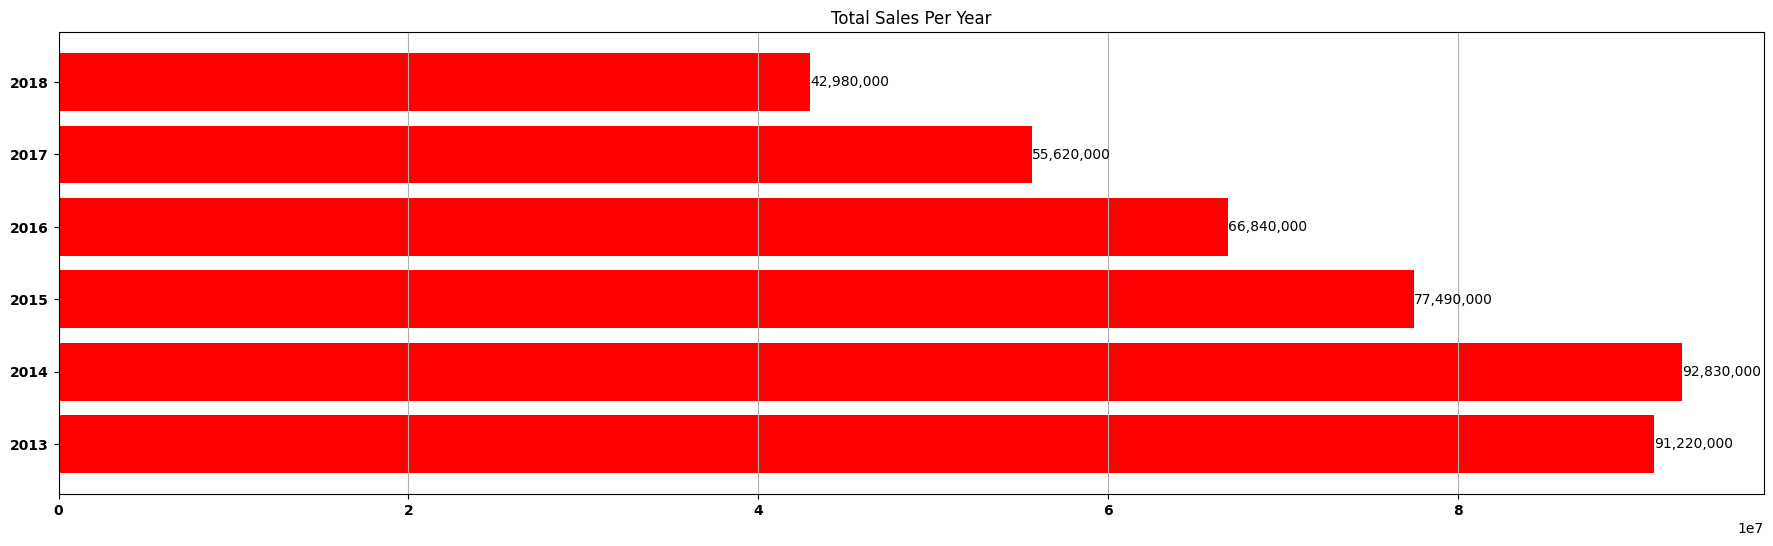

In [11]:
sales_per_year_df = df.groupby('Year')['Total Sales'].sum().reset_index()
sales_per_year_chart = plt.figure(figsize=(22,6))
bars = plt.barh(sales_per_year_df['Year'], sales_per_year_df['Total Sales'], color='Red')


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,f'{width:,.0f}',
             va='center', ha='left', color='black')
    

plt.title('Total Sales Per Year')
plt.grid(axis='x')
plt.ticklabel_format(axis='x',style='scientific')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.savefig(r"../Python Charts/Total Sales Per Year.png")
print("Saved Successfully !!")

Saved Successfully !!


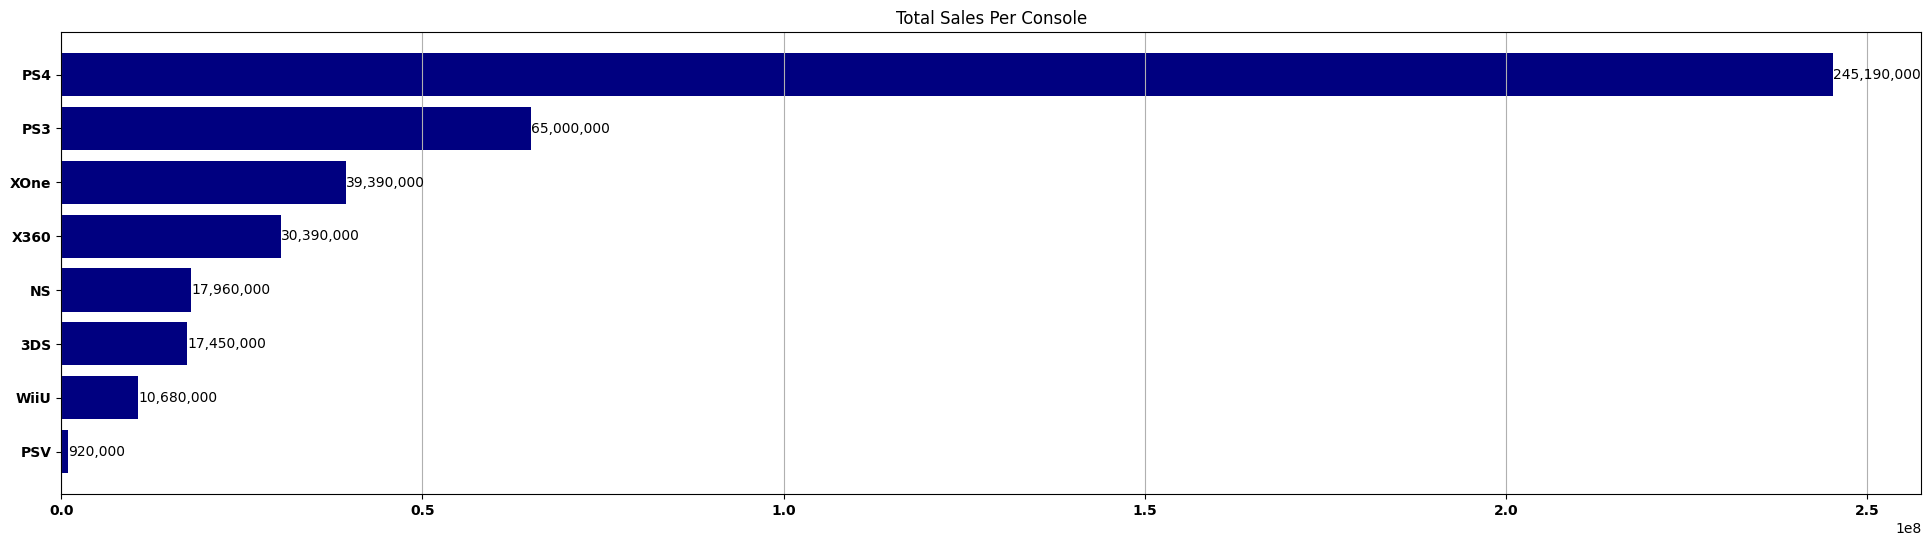

In [12]:
sales_per_console_df = df.groupby("Console")["Total Sales"].sum().reset_index().sort_values(by="Total Sales")
sales_per_console_chart = plt.figure(figsize=(24,6))

bars = plt.barh(sales_per_console_df["Console"],sales_per_console_df["Total Sales"], color = 'Navy')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,f'{width:,.0f}',
             va='center', ha='left', color='black')
    
plt.title("Total Sales Per Console")
plt.grid(axis='x')
plt.ticklabel_format(axis='x',style='scientific')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.savefig(r"../Python Charts/Total Sales Per Console.png")
print("Saved Successfully !!")

Saved Successfully !!


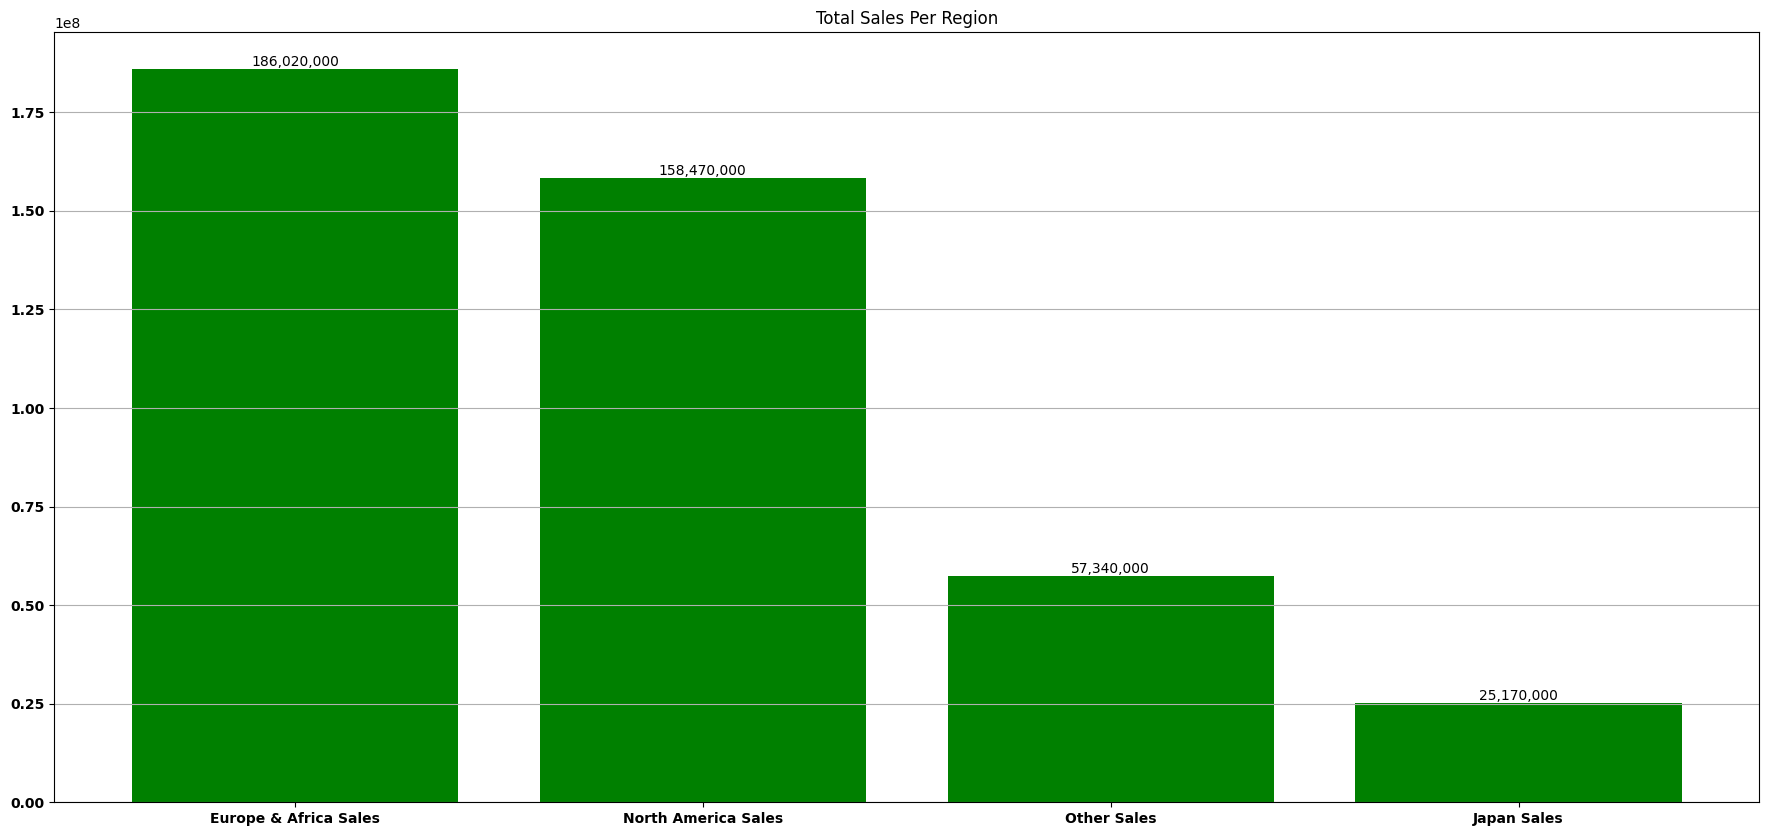

In [13]:
sales_per_region_df = df.loc[:,'North America Sales':'Other Sales']
sums = sales_per_region_df.sum().sort_values(ascending=False)

plt.figure(figsize=(22,10))
plt.bar(sums.index, sums.values, color = 'Green')

for index, value in enumerate(sums.values):
    plt.text(index,value, f'{value:,.0f}', ha='center', va='bottom', color='black')

plt.title("Total Sales Per Region")
plt.grid(axis='y')
plt.ticklabel_format(axis='y', style = 'Scientific')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.savefig(r"../Python Charts/Total Sales Per Region.png")
print("Saved Successfully !!")

Saved Successfully !!


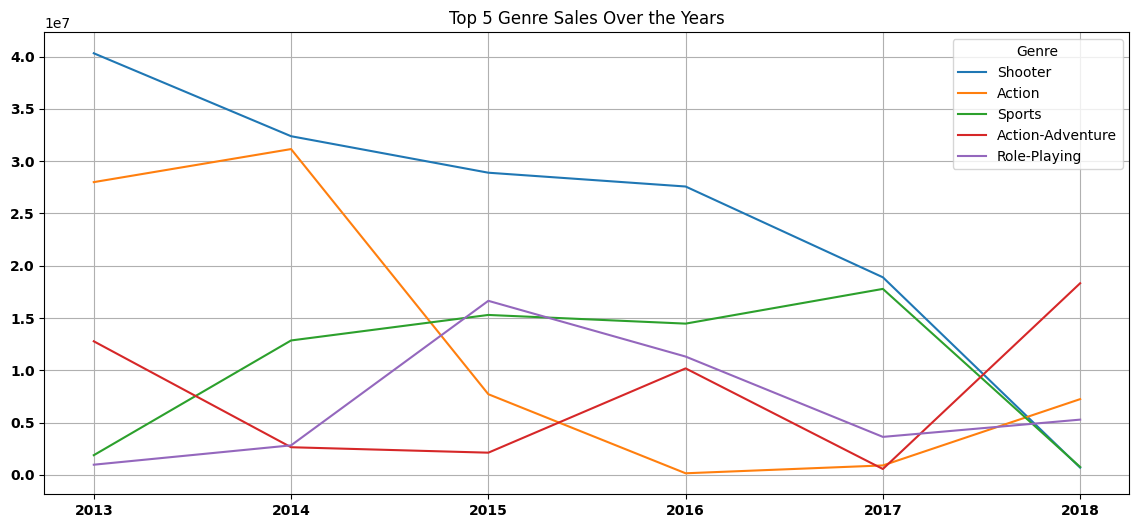

In [19]:
# Knowing The Top 5 Genres Based on Total Sales:

genre_sales_over_years = df.groupby(["Genre", "Year"])["Total Sales"].sum().reset_index()
total_sales_by_genre = genre_sales_over_years.groupby('Genre')['Total Sales'].sum()
top_genres = total_sales_by_genre.nlargest(5).index

plt.figure(figsize=(14, 6))

for genre in top_genres:
    genre_data = genre_sales_over_years[genre_sales_over_years['Genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['Total Sales'], label=genre)

plt.title('Top 5 Genre Sales Over the Years')
plt.grid(True)
plt.legend(title='Genre')
plt.ticklabel_format(axis='y', style='scientific')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.savefig(r"../Python Charts/Top_5_Genre_Sales_Over_the_Years.png")
print("Saved Successfully !!")